In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1=pd.read_csv('/content/MaunaLoaDailyTemps.csv')

In [ ]:
data2=pd.read_csv('/content/stocks.csv')

In [ ]:
data1.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [ ]:
data1[data1['AvgTemp']>50]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
24,1/25/2014,41.0,62.0,52.0,659,1811
107,4/18/2014,43.0,60.0,52.0,602,1841
108,4/19/2014,43.0,60.0,52.0,602,1841
114,4/25/2014,43.0,59.0,51.0,558,1843
115,4/26/2014,45.0,62.0,54.0,557,1844
...,...,...,...,...,...,...
1732,9/29/2018,43.0,61.0,52.0,613,1812
1733,9/30/2018,43.0,62.0,53.0,613,1811
1734,10/1/2018,40.0,63.0,52.0,613,1811
1737,10/4/2018,43.0,58.0,51.0,614,1808


In [ ]:
data1[data1['MaxTemp']==data1['MaxTemp'].max()]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
533,6/18/2015,45.0,67.0,56.0,544,1903
914,7/3/2016,45.0,67.0,56.0,548,1905


In [ ]:
data1[(data1['MinTemp']==data1['MinTemp'].max()) & (data1['MaxTemp']==data1['MaxTemp'].max())]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset


In [ ]:
data2.head()

,Date,Open,High,Low,Close
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902


In [ ]:
data1.shape

(1825, 6)

In [ ]:
data1.isnull().sum().sum()

12

In [ ]:
col_list=list(data1.columns)

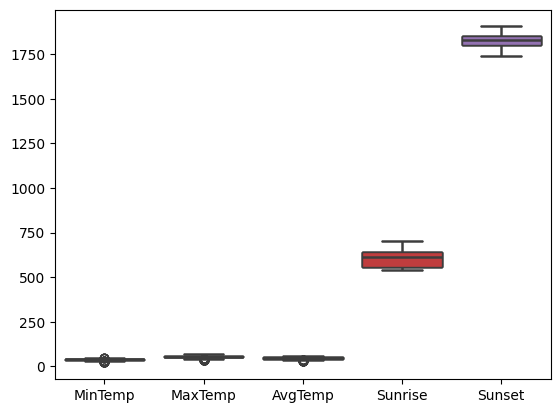

In [ ]:
for i in col_list:
  sns.boxplot(data1)

In [ ]:
data1.corr

<bound method DataFrame.corr of             DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
0       1/1/2014     33.0     46.0     40.0      657    1756
1       1/2/2014     35.0     50.0     43.0      657    1756
2       1/3/2014     36.0     45.0     41.0      657    1757
3       1/4/2014     32.0     41.0     37.0      658    1757
4       1/5/2014     24.0     38.0     31.0      658    1758
...          ...      ...      ...      ...      ...     ...
1820  12/26/2018     35.0     45.0     40.0      654    1752
1821  12/27/2018     33.0     44.0     39.0      655    1752
1822  12/28/2018     33.0     47.0     40.0      655    1753
1823  12/29/2018     36.0     47.0     42.0      655    1753
1824  12/30/2018     39.0     52.0     46.0      656    1754

[1825 rows x 6 columns]>

In [ ]:
data1.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [ ]:
X=data1.drop('DATE',axis=1)

In [ ]:
X.corr()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
MinTemp,1.000000,0.756071,0.917456,-0.426821,0.300492
MaxTemp,0.756071,1.000000,0.951039,-0.374928,0.275876
AvgTemp,0.917456,0.951039,1.000000,-0.422829,0.304711
Sunrise,-0.426821,-0.374928,-0.422829,1.000000,-0.739530
Sunset,0.300492,0.275876,0.304711,-0.739530,1.000000


<Axes: >

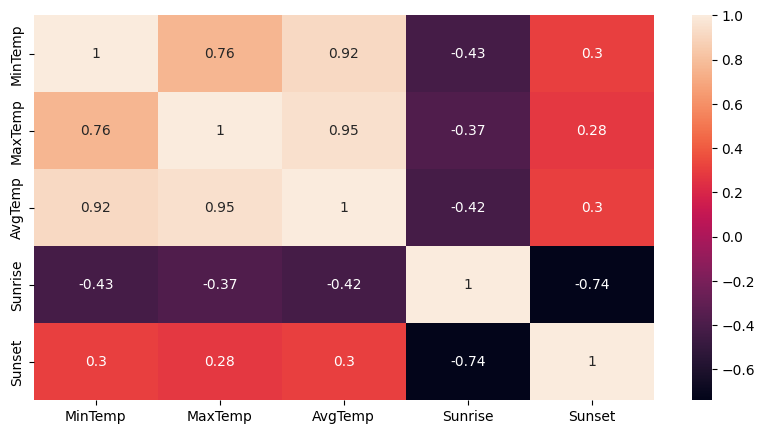

In [ ]:

plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),annot=True)

In [ ]:
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf



In [ ]:
X.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,33.0,46.0,40.0,657,1756
1,35.0,50.0,43.0,657,1756
2,36.0,45.0,41.0,657,1757
3,32.0,41.0,37.0,658,1757
4,24.0,38.0,31.0,658,1758


In [ ]:
data1['AvgTemp']=data1['AvgTemp'].fillna(data1['AvgTemp'].mean())

In [ ]:
from statsmodels.tsa.stattools import adfuller



In [ ]:
results=adfuller(data1['AvgTemp'])


In [ ]:
results

(-6.594563113389793,
 6.977825912591916e-09,
 12,
 1812,
 {'1%': -3.4339640110318004,
  '5%': -2.8631363845692475,
  '10%': -2.567619862152732},
 8176.215795705775)

In [ ]:
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [ ]:
for i,j in zip(keys,results):
  print(f"{i}:{j}")

test_statistics:-6.594563113389793
p_value:6.977825912591916e-09
num_lags:12
num_observations:1812
critical_values:{'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}
AIC:8176.215795705775


<Axes: >

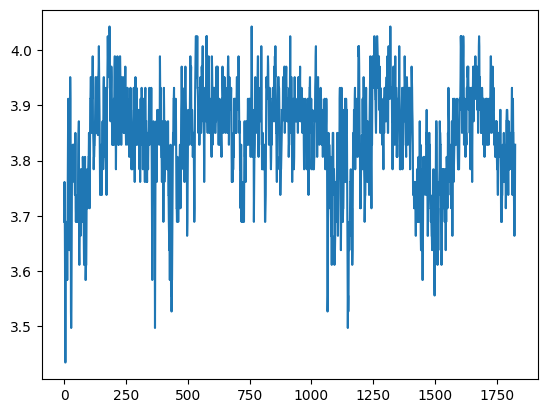

In [ ]:
first_log=np.log(data1['AvgTemp'])
first_log.dropna()
first_log.plot()

In [ ]:
mean_log=data1['AvgTemp'].rolling(window=4).mean()

<Axes: >

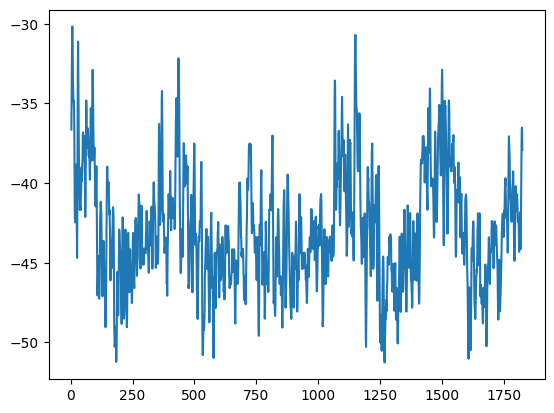

In [ ]:
new_data=first_log-mean_log
new_data.dropna()
new_data.plot()

In [ ]:
new_data.head()

,AvgTemp
0,NaN
1,NaN
2,NaN
3,-36.639082
4,-34.566013


In [ ]:
new_data=new_data.fillna(new_data.mean())

In [ ]:
results=adfuller(new_data)

In [ ]:
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [ ]:
for i,j in zip(keys,results):
  print(f"{i}:{j}")

test_statistics:-4.221317566749047
p_value:0.0006062406869850893
num_lags:25
num_observations:1799
critical_values:{'1%': -3.433990164137254, '5%': -2.8631479299063405, '10%': -2.567626009684832}
AIC:3269.308329285527


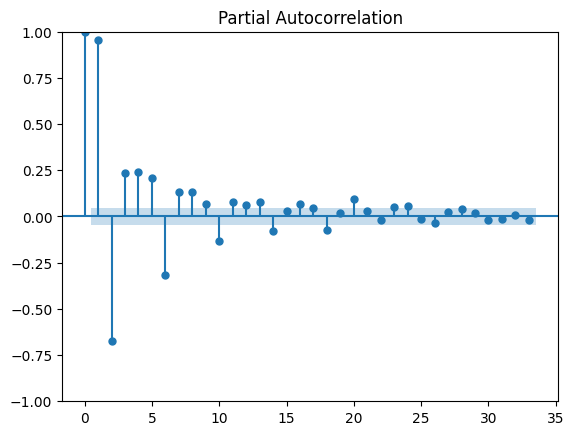

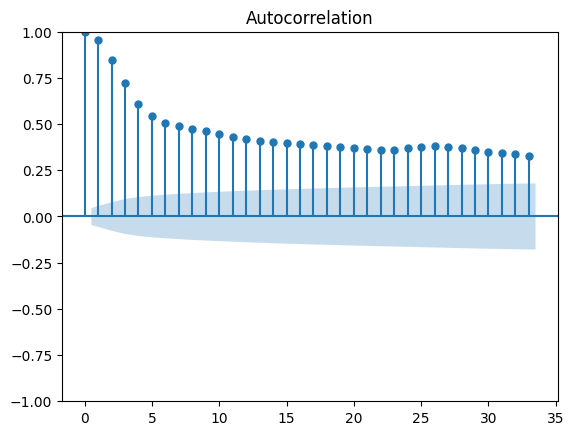

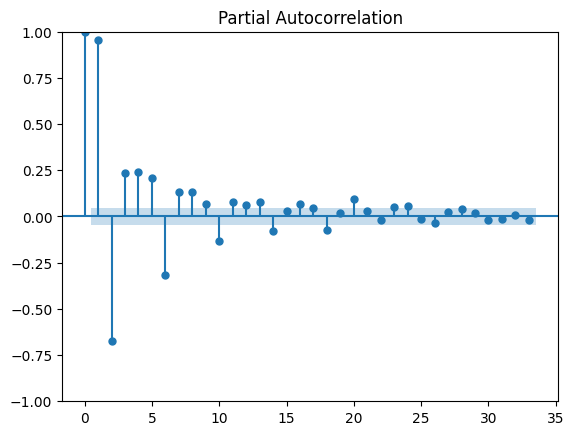

In [ ]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data)
plot_pacf(new_data)

In [ ]:
import itertools
p=d=q=range(0,3)
pdq=list(itertools.product(p,d,q))

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [ ]:
train=new_data.iloc[:120]#first 120 values
test=new_data.iloc[120:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train,order=(3,0,2))

model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -170.035
Date:                Mon, 09 Sep 2024   AIC                            354.070
Time:                        07:36:01   BIC                            373.582
Sample:                             0   HQIC                           361.994
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.9813      1.130    -34.504      0.000     -41.196     -36.767
ar.L1          1.7300      0.132     13.079      0.000       1.471       1.989
ar.L2         -1.3412      0.215     -6.239      0.0

In [ ]:
data2.head()

,Date,Open,High,Low,Close
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902


In [ ]:
data2['Difference']=data2['High']-data2['Low']

In [ ]:
data2.head()

,Date,Open,High,Low,Close,Difference
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902,53.400025
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902,23.250000
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000,21.199951
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902,22.149902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902,70.850098


In [ ]:
fg=data2[data2['Difference']>150]

In [ ]:
fg.shape

(8, 6)

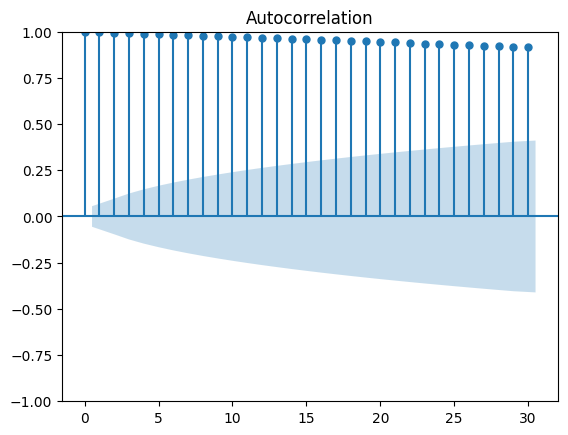

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

# Load data


# Extract the column 'Low'
low = data2['Low']

# Plot ACF
plot_acf(low, lags=30)
plt.show()


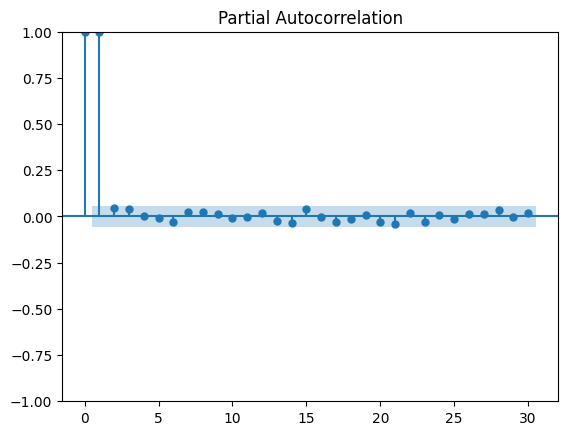

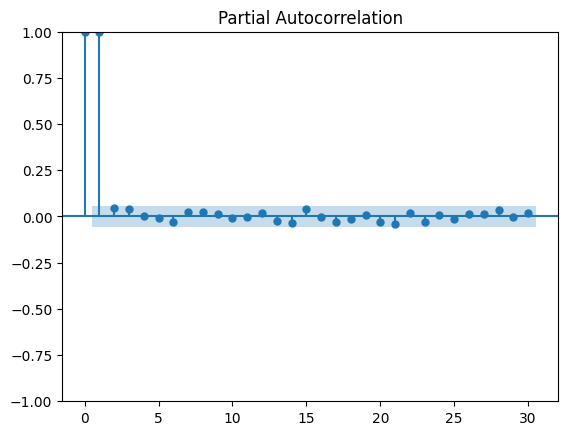

In [ ]:
high=data2['Open']
plot_pacf(high,lags=30)

In [ ]:
data2['Low'].shape

(1235,)

In [ ]:
fg=data2['Low'].iloc[1215:]

In [ ]:
np.mean(fg)

3396.16751715

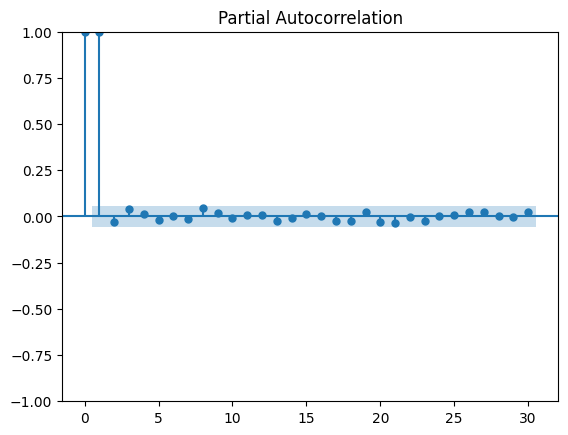

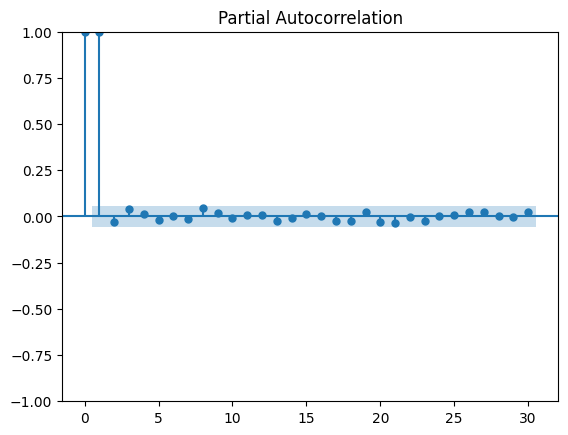

In [ ]:
last=data2['Low']
plot_pacf(last,lags=30)

In [ ]:
data2.shape

(1235, 6)